# 1. Install Dependencies and Setup

In [64]:
import tensorflow as tf
import os

In [65]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [66]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [67]:
import cv2
import imghdr

In [68]:
data_dir = "train_data"

In [69]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [70]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [71]:
import numpy as np
from matplotlib import pyplot as plt

In [72]:
data = tf.keras.utils.image_dataset_from_directory('train_data')

Found 103 files belonging to 3 classes.


In [73]:
data_iterator = data.as_numpy_iterator()

In [74]:
batch = data_iterator.next()

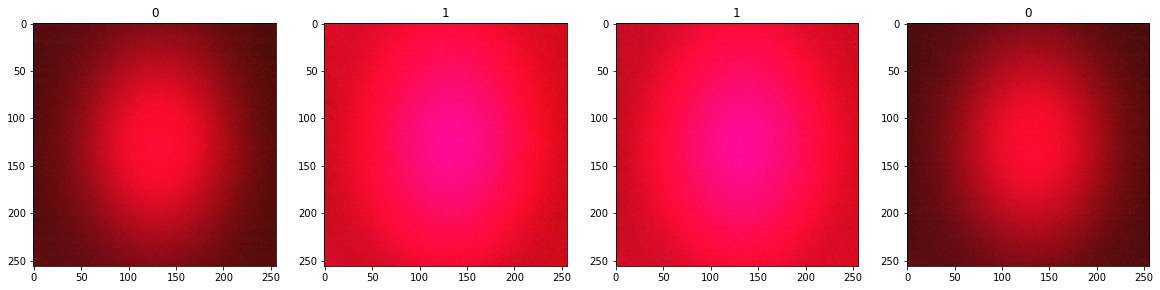

In [75]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [76]:
data = data.map(lambda x,y: (x/255, y))

In [77]:
data.as_numpy_iterator().next()

(array([[[[0.8240809 , 0.03125   , 0.08167892],
          [0.7792892 , 0.05514706, 0.07800245],
          [0.7334559 , 0.03909314, 0.06715687],
          ...,
          [0.8845588 , 0.05061274, 0.10839461],
          [0.8485294 , 0.03897059, 0.10110294],
          [0.7456495 , 0.05398284, 0.09080882]],
 
         [[0.7570466 , 0.06084559, 0.11182598],
          [0.7726103 , 0.04111519, 0.06764706],
          [0.78658086, 0.05275735, 0.08088236],
          ...,
          [0.83572304, 0.0473652 , 0.09044117],
          [0.8308211 , 0.03694853, 0.07849265],
          [0.82873774, 0.05655637, 0.09693628]],
 
         [[0.7626838 , 0.0471201 , 0.08535539],
          [0.7427696 , 0.02542892, 0.04901961],
          [0.78878677, 0.05545343, 0.09025735],
          ...,
          [0.8193015 , 0.06060049, 0.11666667],
          [0.8536152 , 0.05735294, 0.09950981],
          [0.81556374, 0.04681373, 0.11311275]],
 
         ...,
 
         [[0.8380515 , 0.0622549 , 0.13897058],
          [0.86390

# 5. Split Data

In [78]:
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [79]:
train_size = int(len(data)*.8)
test_size = int(len(data)*.2)

In [80]:
train_size

3

In [81]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [82]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [84]:
model = Sequential()

In [85]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [86]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

# 7. Train

In [88]:
logdir='logs'

In [89]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [90]:
hist = model.fit(train, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 3s 533ms/step - loss: 0.8001 - accuracy: 0.4688
Epoch 2/20
3/3 [==============================] - 2s 642ms/step - loss: 0.6186 - accuracy: 0.4479
Epoch 3/20
3/3 [==============================] - 2s 729ms/step - loss: 0.6189 - accuracy: 0.6875
Epoch 4/20
3/3 [==============================] - 2s 667ms/step - loss: 0.3714 - accuracy: 0.5833
Epoch 5/20
3/3 [==============================] - 2s 574ms/step - loss: 0.3186 - accuracy: 0.4688
Epoch 6/20
3/3 [==============================] - 2s 581ms/step - loss: 0.2591 - accuracy: 0.7083
Epoch 7/20
3/3 [==============================] - 2s 518ms/step - loss: 0.2410 - accuracy: 0.6979
Epoch 8/20
3/3 [==============================] - 2s 530ms/step - loss: 0.0033 - accuracy: 0.7083
Epoch 9/20
3/3 [==============================] - 2s 540ms/step - loss: -0.0046 - accuracy: 0.7188
Epoch 10/20
3/3 [==============================] - 2s 528ms/step - loss: 0.0317 - accuracy: 0.7083
Epoch 11/20
3/3 [=

# 8. Plot Performance

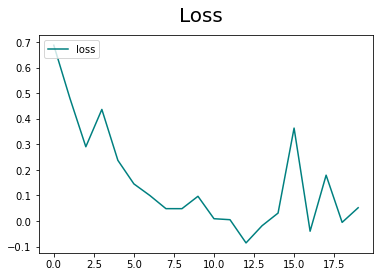

In [53]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

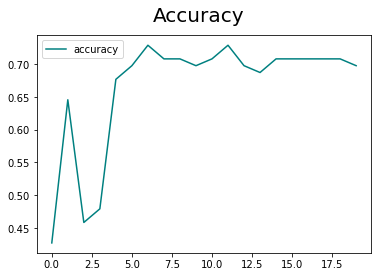

In [54]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()